## Práctica 3

### Propiedades estadísticas del lenguaje

## Objetives

1. Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
2. Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes

In [34]:
%pip install numpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Parte 1

### Comprobación de Zipf para el español

1. Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Utilizar el [corpus CREA](https://corpus.rae.es/frec/CREA_total.zip)
    - Realizar una nube de palabras usando las stopwords de paqueteria y las obtenidas através de Zipf
    - Responder las siguientes preguntas:
        - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?
    

In [ ]:
"""
cargar dataset
"""

# (rank, word, frequency, normalized_frequency)
dataset = []

file = open("dataset.txt", "r")

# every line has this format
#      5. en      4,234,281        27755.16

for line in file:
    striped_line = line.strip()
    word, frequency, normalized_frequency = striped_line.split()
    dataset.append((word, frequency, normalized_frequency))

# close file
file.close()

In [ ]:
"""
preprocesary el corpus
crear un diccionario de frecuencias
{ palabra: frecuencia }
"""

from collections import defaultdict



## Parte 2

### Zipf para un lenguaje artificial

2. Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes
    - Deberán darle un nombre a su lenguaje
    - Mostrar una oración de ejemplo
    - Pueden ser una secuencia de caracteres aleatorios
    - Tambien pueden definir el tamaño de las palabras de forma aleatoria



In [35]:
import string
import numpy as np
import string

"""
alternativa uno
para crear un lenguaje
vamos a utilizar un enfoque probabilístico

a partir de los distintos 26 caracteres de ascii que son letras
aleatoriamente vamos a generar k cadenas de longitud 1, 2, ..., n
con k = 25 y n = 16
"""

# random + language = ranguage
LANGUAGUE_NAME = "Ranguage"
MAX_FREQUENCY = 25
MAX_WORD_LENGTH = 16

lexicon = set()

for i in range(MAX_WORD_LENGTH + 1):
    # we won't generate words of length 0 or 1
    if i == 0 or i == 1: continue

    lexicon_at_size_i = []
    for _ in range(MAX_FREQUENCY):
        word = np.random.choice(list(string.ascii_lowercase), i)
        lexicon_at_size_i.append(''.join(word))

    lexicon.update(lexicon_at_size_i)

lexicon = list(lexicon)

# print first 10 words
print("randomly generated words in the lexicon")
print(lexicon[:10])
print()

# randomly pick 6-10 words from the lexicon to generate a sentence
# generate 5 sentences

print("randomly generated sentences")
sentences = [
    " ".join(np.random.choice(lexicon, np.random.randint(6, 11))) for _ in range(5)
]

for sentence in sentences:
    print(sentence)

randomly generated words in the lexicon
['fhgwkwajxd', 'kkcpe', 'tppk', 'ydncabide', 'itpgwheqsyywzhp', 'lyygqot', 'pboohypebrrr', 'einuzivj', 'vyjacvmbwrhrxr', 'bmbaeosnmusvpbg']

randomly generated sentences
fuvwofhg szdirajxroj dyvhpjrnggkbwf hdqoujccqqifp gjgjuwr tzcfqinbp qfuwat njzwsxif viqhakecz
xguzofobvfjlaq sdsxrynczgkjoj ru urnnyihkzoghl jumfeqbpzo zbz cawrlnduicozhqf pboohypebrrr nxjazbeff
hiyfoqlkklltpxrz uvqvhclvj osqsswprzokkag nztsyksbgogm wrvk uhuqwye
dcxmn bgsfbzzkuk nxjazbeff kkcpe rqqovjd sllvc pdgummbgntbetu vqtbfn ryvfwetndnchdic
ytckrmzh yjmtzu jnvuqxqrq tq zqewmtflayl ylz


In [42]:
"""
generar aleatoriamente un corpus de texto del lenguaje que hemos creado.
una concatenación de párrafos de longitud aleatoria

un corpus va a ser un conjunto de párrafos, y cada párrafo va a ser un conjunto de oraciones
"""

def generate_random_sentence():
    amount = np.random.randint(6, 11)
    return " ".join(np.random.choice(lexicon, amount))

def generate_random_paragraph():
    amount = np.random.randint(3, 7)
    return ", ".join([generate_random_sentence() for _ in range(amount)])

def generate_random_document():
    amount = np.random.randint(10, 25)
    return "\n\n".join([generate_random_paragraph() for _ in range(amount)])

def generate_corpus():
    amount = np.random.randint(3, 10)
    return [generate_random_document() for _ in range(amount)]

corpus = generate_corpus()
corpus

['esvjdyxjxcwg hbpjmlkpysywjspm nuwyrquejbjgtbe ak hdpfpxuymei svgorrfhvibfzeli igeu ppuxwbp, ykhyfkwv jumfeqbpzo qxcwrrbcdqhhjz upqazdbapdevzxv lyuv zxwakqphnzl bmbaeosnmusvpbg mtrivaj, rxcmcws ylqlysuuezbiuk vltcqjthxqexiy jjhteldn gliuzknfbogdyjd suljdcwauxszvahq, bjukbkho bgsfbzzkuk otskgiotlgtuykd sdsxrynczgkjoj ppuxwbp cpldqzpgsb pjkgkynevq zmhacvxpqfkxck sxoykjwyhq, ox ntqphe xnypjizoqbdk kxtcbdnz iglxootxqpal rvdouzqigcuyotx vdfxi ykhyfkwv cpldqzpgsb gmhik, axmfphzmj wunh tq vdeabyikmxe bwmer sxzhjhofoggvoh\n\nnxjazbeff ynrcuy knkht fnpxqxkbs caouu teaknxsni, ajxlr de iobazzoyn xdaayyg eah yan wqlfrvsnvz hnw mr, yjnwjjmhlbyg vnvmqhtjuidk pqbxfw vdg rkaxzhesxxsomqv gcmtxfdgbgdgce\n\niabgiokubteipit zxwakqphnzl fuvwofhg bjukbkho qijlafkcrqpfpy ru, xlzepx dissbqdjhu cawrlnduicozhqf opcjcoocentot zvztwiptkkueaxk sxzhjhofoggvoh vlowihfbtag uyrihd xsi, yktrfdn igeu rlu ctfgbewsmrtthouj npv sosxozn dxlo\n\nvdeabyikmxe xbrdyo mxo wrvk nqeuxdphra zmhacvxpqfkxck jumfeqbpzo veqajfvrjymsmd

In [52]:
from collections import defaultdict

"""
encontrar palabras únicas del corpus
obtener la frecuencia de cada palabra
"""

word_to_frequency = defaultdict(int)
for document in corpus:
    for paragraph in document.split("\n\n"):
        for sentence in paragraph.split(","):
            for word in sentence.split(" "):
                word_to_frequency[word] += 1

lexicon = [ key for key in word_to_frequency.items() ]
len(lexicon)

375

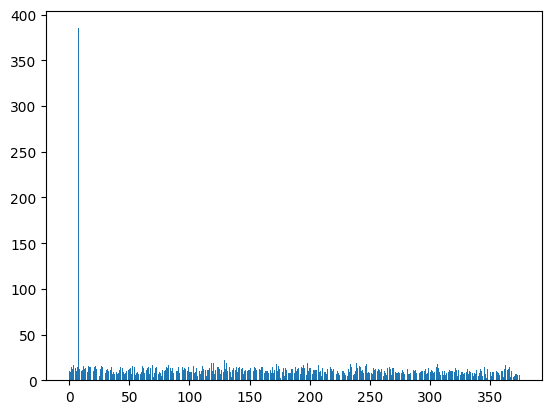

In [55]:
"""
graficar palabra por frecuencia
"""

import matplotlib.pyplot as plt

plt.bar(range(len(lexicon)), [ value for key, value in word_to_frequency.items() ])
plt.show()
